# Overview of `isochrones`

## The `ModelGrid` object

A `ModelGrid` gives an easy interface to retrieve a grid of stellar models, along with synthetic photometry in any available bands, as desired.  I have implemented the [dartmouth](http://stellar.dartmouth.edu/models/) and [MIST](http://waps.cfa.harvard.edu/MIST/) models, the implementation of which should provide guidance on doing other models.

In [1]:
from isochrones.dartmouth import DartmouthModelGrid
from isochrones.mist import MISTModelGrid

In [2]:
g_dar = DartmouthModelGrid(['g','r','i','J','H','K'])
print(len(g_dar.df))
g_dar.df.head()

136424


EEP       MMo  LogTeff    LogG  LogLLo      age  feh        g  \
feh  age                                                                      
-2.5 8.39794    2  0.278163   3.6245  5.0890 -1.7552  8.39794 -2.5  10.4301   
     8.39794    3  0.318852   3.6304  5.0631 -1.6467  8.39794 -2.5  10.1021   
     8.39794    4  0.335466   3.6325  5.0521 -1.6052  8.39794 -2.5   9.9782   
     8.39794    5  0.351598   3.6348  5.0424 -1.5660  8.39794 -2.5   9.8589   
     8.39794    6  0.365625   3.6368  5.0302 -1.5285  8.39794 -2.5   9.7460   

                   r       i       J       H       K  
feh  age                                              
-2.5 8.39794  9.3804  8.9561  7.6001  7.0973  6.9453  
     8.39794  9.0891  8.6789  7.3456  6.8440  6.6910  
     8.39794  8.9782  8.5730  7.2479  6.7473  6.5942  
     8.39794  8.8724  8.4726  7.1565  6.6571  6.5042  
     8.39794  8.7719  8.3770  7.0688  6.5708  6.4181

In [3]:
DartmouthModelGrid.phot_systems

('SDSSugriz', 'UBVRIJHKsKp', 'WISE', 'LSST', 'UKIDSS')

In [4]:
DartmouthModelGrid.phot_bands

{'LSST': ['LSST_r', 'LSST_u', 'LSST_y', 'LSST_z', 'LSST_g', 'LSST_i'],
 'SDSSugriz': ['sdss_z', 'sdss_i', 'sdss_r', 'sdss_u', 'sdss_g'],
 'UBVRIJHKsKp': ['B', 'I', 'H', 'J', 'Ks', 'R', 'U', 'V', 'D51', 'Kp'],
 'UKIDSS': ['Y', 'H', 'K', 'J', 'Z'],
 'WISE': ['W4', 'W3', 'W2', 'W1']}

In [5]:
DartmouthModelGrid.get_band('g')

('SDSSugriz', 'sdss_g')

In [9]:
g_mist = MISTModelGrid(['G','B','V','J','H','K','W1','W2','W3'])
print(len(g_mist.df))
g_mist.df.head()

1337872


EEP  log10_isochrone_age_yr  initial_mass  \
feh  log10_isochrone_age_yr                                              
-4.0 5.0                      35                     5.0      0.100000   
     5.0                      36                     5.0      0.102237   
     5.0                      37                     5.0      0.106773   
     5.0                      38                     5.0      0.111297   
     5.0                      39                     5.0      0.115355   

                             log_Teff     log_g     log_L    Z_surf  feh  \
feh  log10_isochrone_age_yr                                                
-4.0 5.0                     3.617012  3.350551 -0.489713  0.000002 -4.0   
     5.0                     3.617808  3.348436 -0.476535  0.000002 -4.0   
     5.0                     3.619423  3.344021 -0.449683  0.000002 -4.0   
     5.0                     3.621033  3.339692 -0.422979  0.000002 -4.0   
     5.0                     3.622476  3.335817 -0.399043  0.000002 -4.0   

                             phase         G         B         V         J  \
feh  log10_isochrone_age_yr                                                  
-4.0 5.0                      -1.0  6.209898  8.038698  6.797339  4.440977   
     5.0                      -1.0  6.174484  7.993731  6.758918  4.410222   
     5.0                      -1.0  6.102365  7.902319  6.680719  4.347527   
     5.0                      -1.0  6.030681  7.811509  6.603000  4.285196   
     5.0                      -1.0  5.966488  7.730274  6.533423  4.229348   

                                    H         K        W1        W2        W3  
feh  log10_isochrone_age_yr                                                    
-4.0 5.0                     3.901639  3.719082  3.540864  3.457722  3.352242  
     5.0                     3.871181  3.689802  3.512790  3.430175  3.325584  
     5.0                     3.809019  3.630053  3.455529  3.374010  3.271257  
     5.0                     3.747159  3.570613  3.398607  3.318209  3.217325  
     5.0                     3.691687  3.517317  3.347594  3.268223  3.169042

In [12]:
MISTModelGrid.phot_systems

('CFHT',
 'DECam',
 'GALEX',
 'JWST',
 'LSST',
 'PanSTARRS',
 'SDSS',
 'SPITZER',
 'SkyMapper',
 'UBVRIplus',
 'UKIDSS',
 'WISE')

In [6]:
MISTModelGrid.get_band('G')

('UBVRIplus', 'Gaia_G')

## The `Isochrone` object

In order to usefully interface with these model grids, we have to interpolate.  This is done using the (perhaps not greatly named) `Isochrone` object.  There are two flavors of this object.  One (the original) is based on `scipy.interpolate.LinearNDInterpolater`, which does interpolation based on a Delaunay triangulation of the points (essentially storing nearest neighbor information).  For the size of the Dartmouth grids, this is marginally feasible, as the triangulation takes about 10 minutes to compute and about ~100Mb to store. 

However, the MIST grids are ~10x larger than Dartmouth, and the scaling is bad, so the triangulation method becomes no longer feasible. So instead, I implemented a `FastIsochrone` version of this interpolation that takes advantage of the fact that two of the three dimensions are regular grids in order to quickly find the "box" surrounding a given point, and then I do inverse-distance nearest neighbor interpolation using this box of surrounding points.  NB: it's important to do some version of "surrounding" interpolation like this (rather than straight-up k-nearest-neighbors with a KD tree, for example) because the distance between successive gridded values of feh and age are much larger than the distances between adjacent values of mass on the same track, so a k-nearest-neighbors approach always grabs points on the same metallicity & age track.  Also, my implementation of the "find-the-surrounding-box" interpolation for a single point is about ~10x faster than the KDTree.  

I do note, however, that I trust the Delaunay interpolation more near-ish the edges, where finding a proper surrounding box may be difficult---in other words, this might lead to less desirable results during, e.g., the fast stages of stellar end-of-life.  (In fact, I'm not even sure how much I trust the Delaunay interpolation in locations where evolution is happening quickly.)

Below is a demo of the `Isochrone` objects for both the Dartmouth and MIST models.  The general idea is that physical properties can get called as a function of (`mass`, `age`, `feh`), where `age` is really $\log_{10} (\rm{age}\,[{\rm Gyr}])$, and then magnitudes take those same three parameters plus `distance` and `AV` (V-band extinction). 

In [1]:
from isochrones.dartmouth import Dartmouth_Isochrone
from isochrones.mist import MIST_Isochrone

In [5]:
dar = Dartmouth_Isochrone()
dar.bands #default bands

['B', 'g', 'i', 'H', 'K', 'J', 'r', 'W3', 'W2', 'W1', 'V', 'z', 'Kepler']

In [2]:
mist = MIST_Isochrone()
mist.bands

['B', 'G', 'H', 'J', 'K', 'Kepler', 'V', 'W1', 'W2', 'W3', 'g', 'i', 'r', 'z']

In [6]:
mass, age, feh = (1.01, 9.71, 0.01)
print(dar.logg(mass, age, feh), mist.logg(mass, age, feh))
print(dar.Teff(mass, age, feh), mist.Teff(mass, age, feh))

(array(4.408640829840677), 4.387984692365118)
(5815.8688686250534, 5857.343980791661)


In [7]:
mist.mag['g'](mass, age, feh, 200, 0.2), mist.mag['V'](mass, age, feh, 200, 0.2)

(11.607620902839665, 11.28761212387333)

In [14]:
# Compare evaluation time
%timeit dar.logg(mass, age, feh)
%timeit mist.logg(mass, age, feh)

The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 38 µs per loop
The slowest run took 5.04 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.54 µs per loop


In [15]:
distance, AV = (200, 0.2)
pars = (mass, age, feh, distance, AV)
for ic in (dar, mist):
    print('{} bands:'.format(ic.name))
    for b in ic.bands:
        print(b, ic.mag[b](*pars))

dartmouth bands:
('B', 12.126772714254258)
('g', 11.725158088345774)
('i', 11.021427653336364)
('H', 9.765952904833501)
('K', 9.7194581335561825)
('J', 10.097870922620649)
('r', 11.168505247023564)
('W3', 9.7243946327150237)
('W2', 9.7210010337284078)
('W1', 9.6973399490092405)
('V', 11.384702356394403)
('z', 10.981521849681439)
('Kepler', 11.108476442992474)
mist bands:
('G', 11.085998415469961)
('B', 12.044517028396866)
('V', 11.356504915090198)
('J', 10.055603443622765)
('H', 9.7110504962454964)
('K', 9.6687051321753614)
('W1', 9.6484855454972731)
('W2', 9.6555198018855872)
('W3', 9.6722463844300304)
('g', 11.607620902839665)
('r', 11.127142831988875)
('i', 10.985222340693591)
('z', 10.940831465006582)
('Kepler', 11.054185808664412)


We can also compare two different interpolation schemes using the same grid:

In [16]:
from isochrones.dartmouth import Dartmouth_FastIsochrone
dar2 = Dartmouth_FastIsochrone(dar.bands)
for b in dar.bands:
    print(b, dar.mag[b](*pars), dar2.mag[b](*pars))

('B', 12.126772714254258, 12.142501391825617)
('g', 11.725158088345774, 11.738968093736943)
('i', 11.021427653336364, 11.030306446305024)
('H', 9.765952904833501, 9.7716223146510437)
('K', 9.7194581335561825, 9.7247833869584532)
('J', 10.097870922620649, 10.104702993098025)
('r', 11.168505247023564, 11.178429066024524)
('W3', 9.7243946327150237, 9.72952246655497)
('W2', 9.7210010337284078, 9.726713657217573)
('W1', 9.6973399490092405, 9.7024906798708948)
('V', 11.384702356394403, 11.396181160575477)
('z', 10.981521849681439, 10.98969308854009)
('Kepler', 11.108476442992474, 11.118761892390683)


## The `StarModel` object

These model grids and interpolation schemes are great, but their purpose for existing is mostly to serve the `StarModel` object, which allows for fitting stellar properties.

In [17]:
from isochrones import StarModel

In [19]:
mod = StarModel(mist, Teff=(5700,100), logg=(4.5,0.1), feh=(0.0,0.1))
mod.fit(basename='spec_demo')

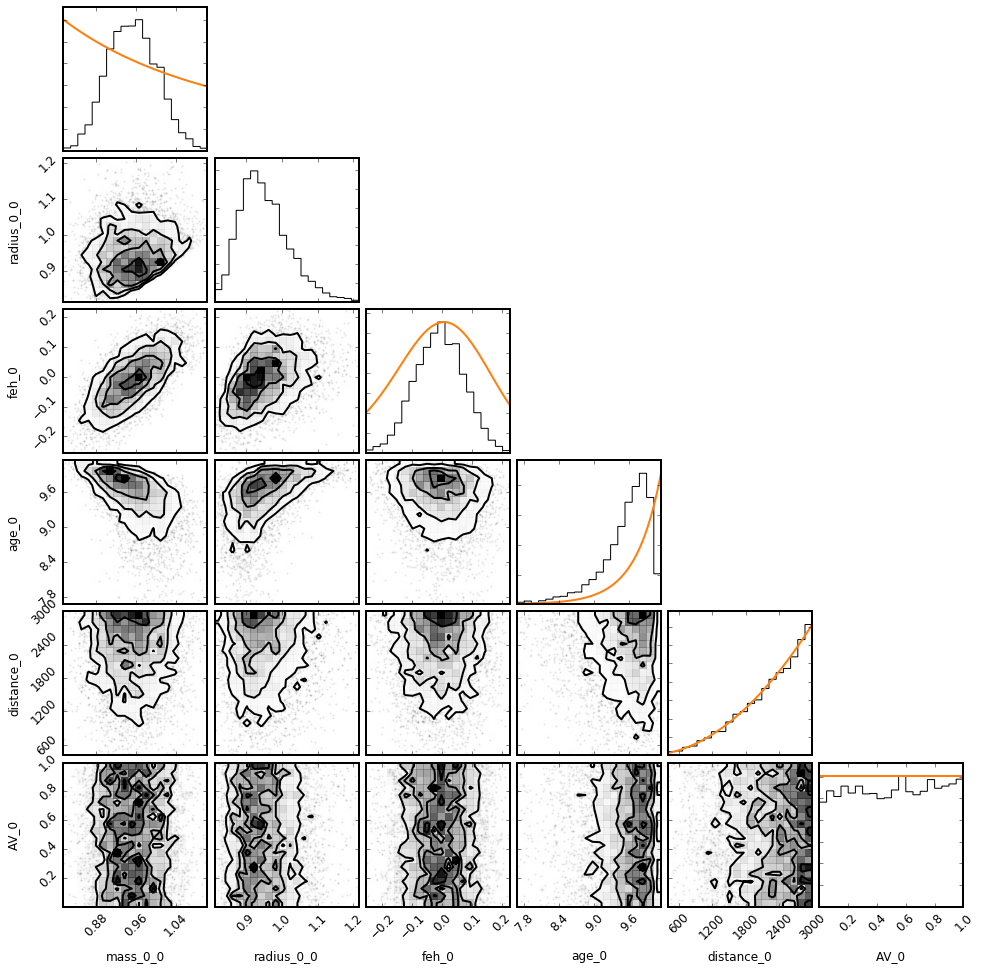

In [20]:
%matplotlib inline
mod.corner_physical();

OK, that was easy; now what if only broadband photometry is available?

In [21]:
mags = {b:(mist.mag[b](*pars), 0.02) for b in ['G', 'B','V','J','W1']}
mod2 = StarModel(mist, **mags)

In [22]:
mod2.fit(basename='phot_demo')

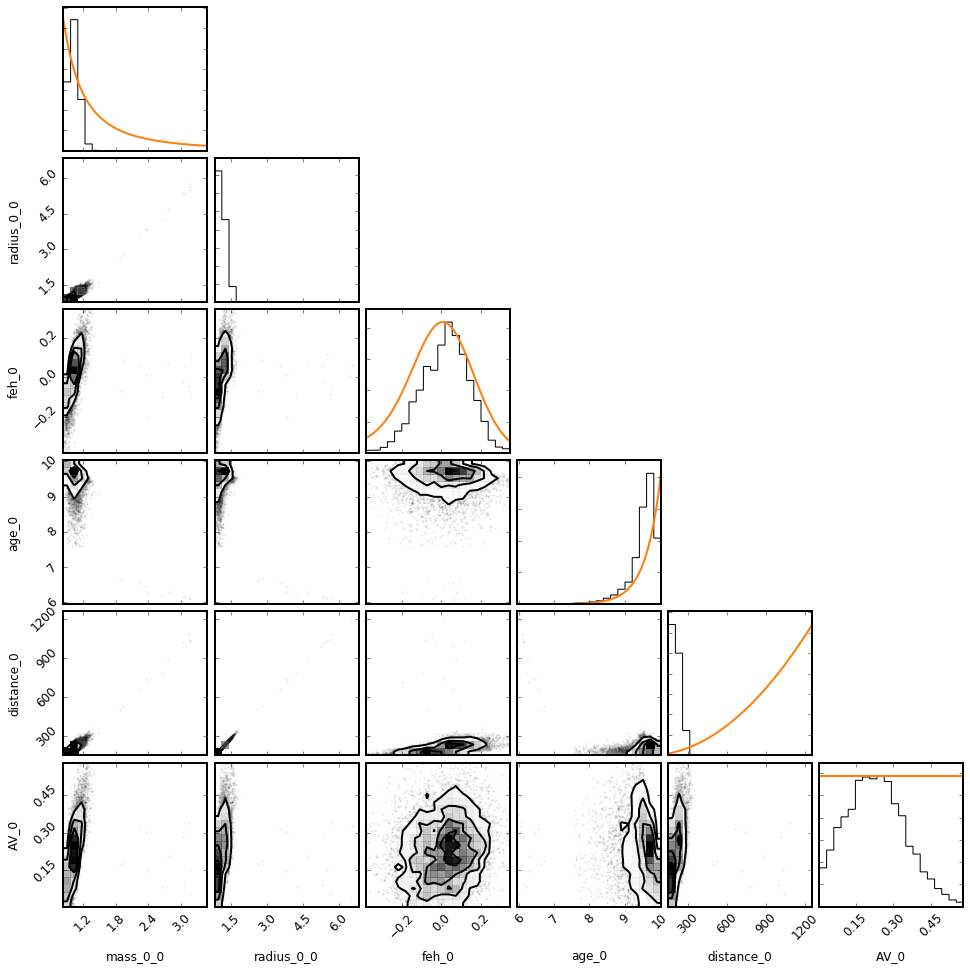

In [23]:
mod2.corner_physical();

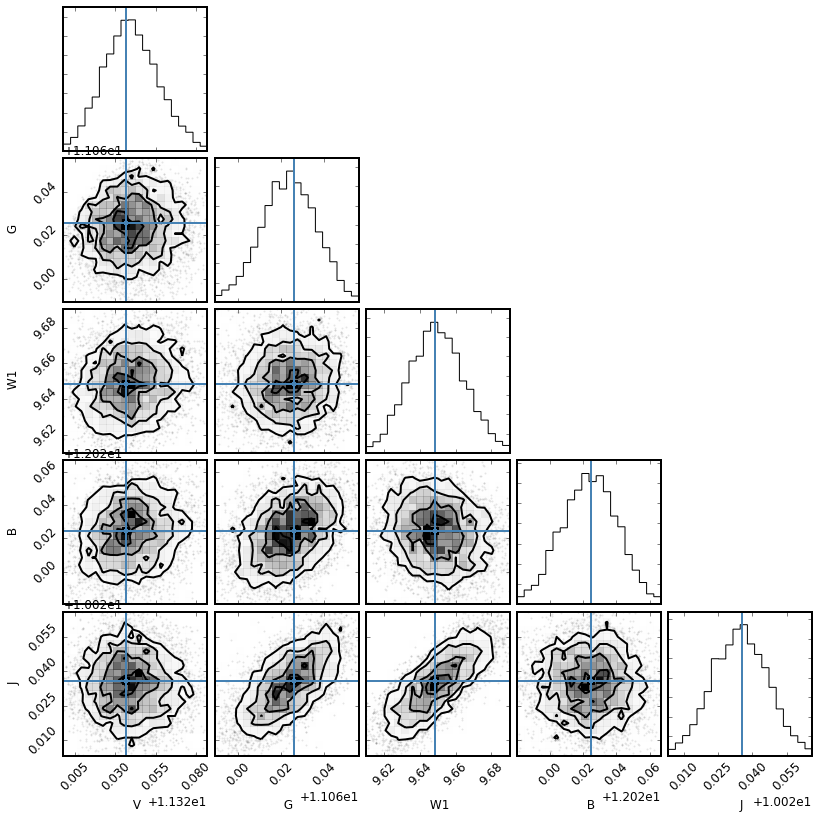

In [24]:
# And, just to take a look at how the samples compare with the observations
mod2.corner_observed();

We can also include parallax, so we can see how much parallax might help in this particular situation.

In [25]:
mod3 = StarModel(mist, parallax=(5.0, 0.4), **mags)
mod3.fit(basename='plax_demo')

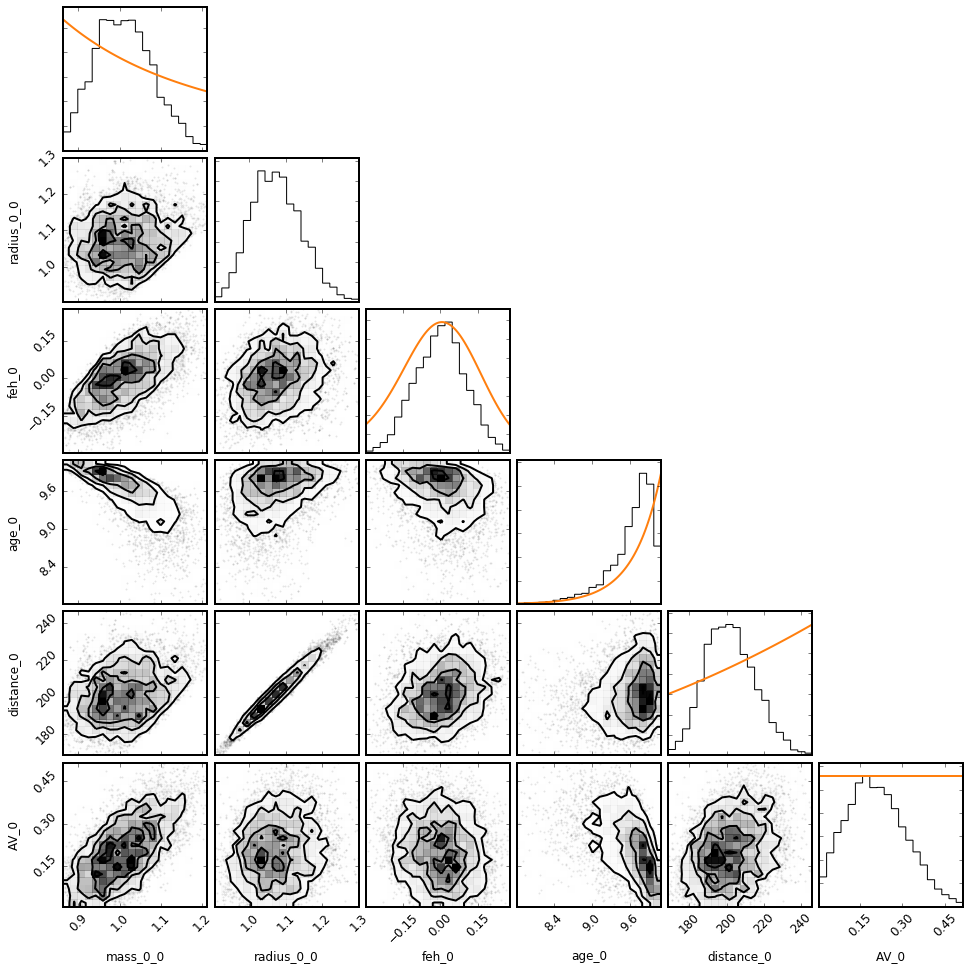

In [26]:
mod3.corner_physical();

In [30]:
# How much does the measurement of, e.g., radius improve when we have the parallax?

print(mod2.samples.mass_0_0.quantile([0.15, 0.85]))
print(mod3.samples.mass_0_0.quantile([0.15, 0.85]))

0.15    0.945777
0.85    1.142604
Name: mass_0_0, dtype: float64
0.15    0.938098
0.85    1.084782
Name: mass_0_0, dtype: float64


In [31]:
# What about measuring the AV?
print(mod2.samples.AV_0.quantile([0.15, 0.85]))
print(mod3.samples.AV_0.quantile([0.15, 0.85]))

0.15    0.103498
0.85    0.354276
Name: AV_0, dtype: float64
0.15    0.096161
0.85    0.321410
Name: AV_0, dtype: float64


Bottom line seems to be that parallax helps, but not enormously much over the multiband photometry on its own---though of course this is assuming that the stellar models *are* the truth! 

## More about `StarModel`

We can do much more with the `StarModel` object.  In particular, we can model binary stars.  Let's take a look at some examples.

In [32]:
!cat ../isochrones/tests/star2/star.ini

RA = 299.268036
dec = 45.227428

[twomass]
resolution=4.
relative=False
J = 13.513, 0.02
H = 12.845, 0.02
K = 12.693, 0.02
separation_1 = 10
PA_1 = 100.
J_1 = 12.513, 0.02
H_1 = 11.845, 0.02
K_1 = 11.693, 0.02

[WISE]
resolution=4.
relative=False
W1 = 10, 0.02
W2 = 9.7, 0.02
W3 = 9.5, 0.02
separation_1 = 10
PA_1 = 100.
W1_1 = 9, 0.02
W2_1 = 8.7, 0.02
W3_1 = 8.5, 0.02


In [33]:
mod4 = StarModel.from_ini(mist, '../isochrones/tests/star2')

In [34]:
mod4.obs.print_ascii()

root
 ╠═ WISE W1=(10.00, 0.02) @(0.00, 0 [4.00])
 ║  ╚═ WISE W2=(9.70, 0.02) @(0.00, 0 [4.00])
 ║     ╚═ WISE W3=(9.50, 0.02) @(0.00, 0 [4.00])
 ║        ╚═ twomass H=(12.85, 0.02) @(0.00, 0 [4.00])
 ║           ╚═ twomass J=(13.51, 0.02) @(0.00, 0 [4.00])
 ║              ╚═ twomass K=(12.69, 0.02) @(0.00, 0 [4.00])
 ║                 ╚═ 0_1
 ╚═ WISE W1=(9.00, 0.02) @(10.00, 100 [4.00])
    ╚═ WISE W2=(8.70, 0.02) @(10.00, 100 [4.00])
       ╚═ WISE W3=(8.50, 0.02) @(10.00, 100 [4.00])
          ╚═ twomass H=(11.85, 0.02) @(10.00, 100 [4.00])
             ╚═ twomass J=(12.51, 0.02) @(10.00, 100 [4.00])
                ╚═ twomass K=(11.69, 0.02) @(10.00, 100 [4.00])
                   ╚═ 0_0


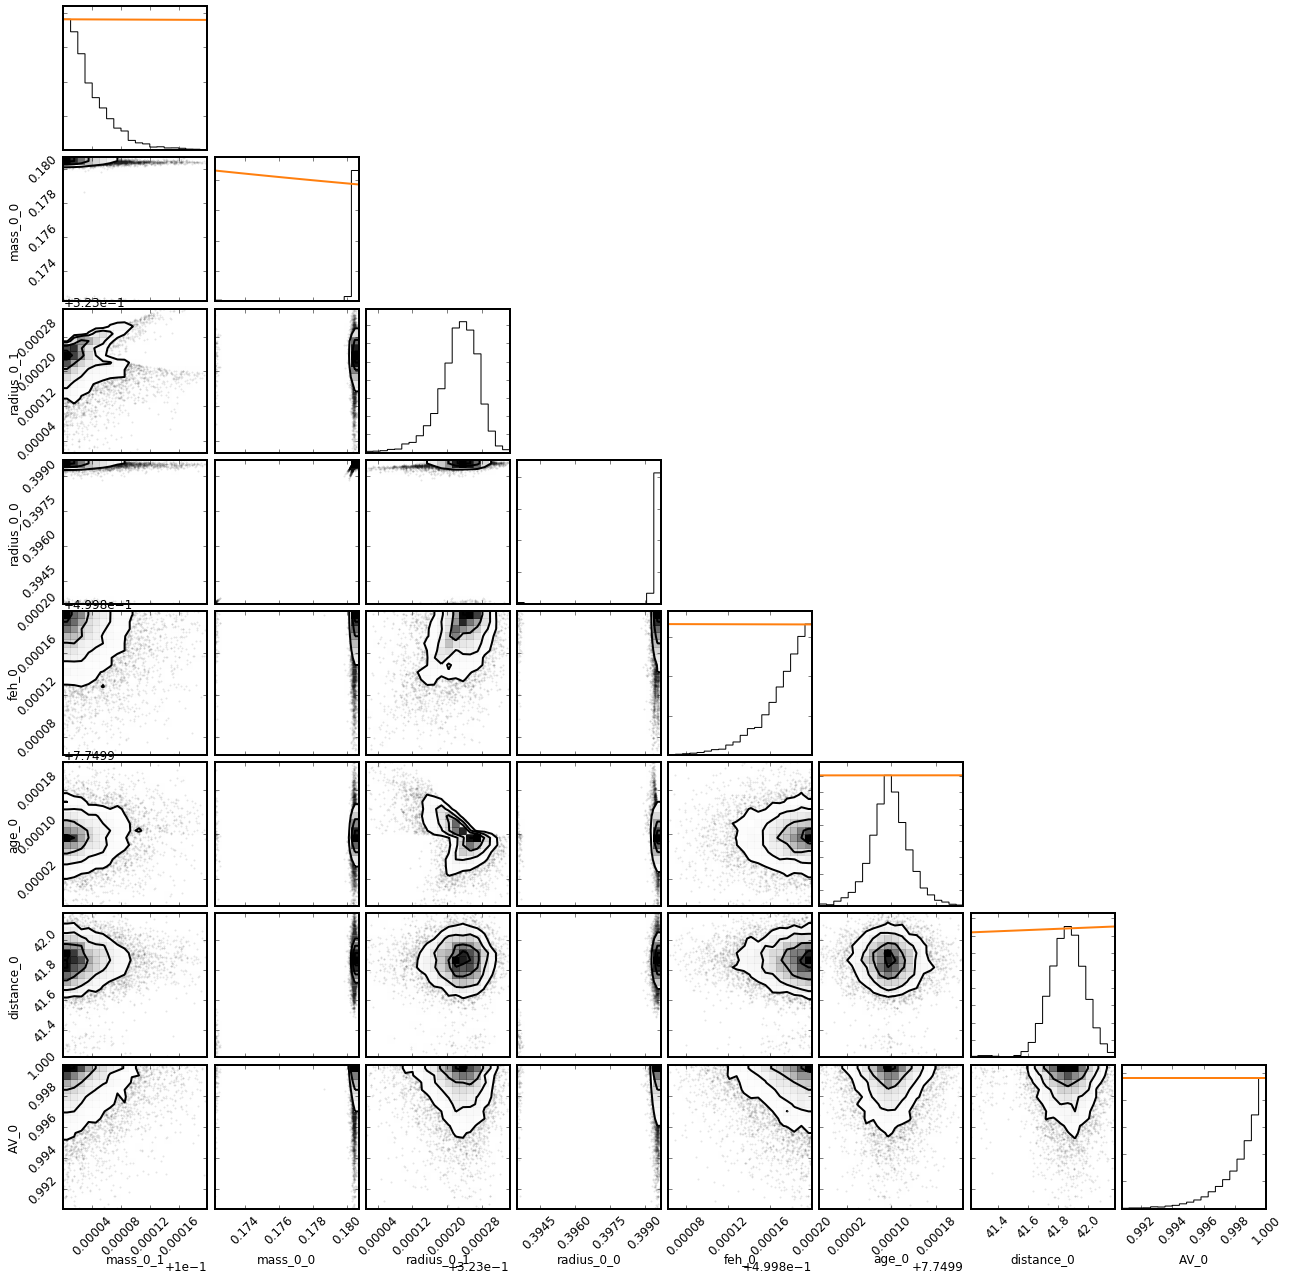

In [43]:
mod4.fit(basename='star2_demo')
mod4.corner_physical();

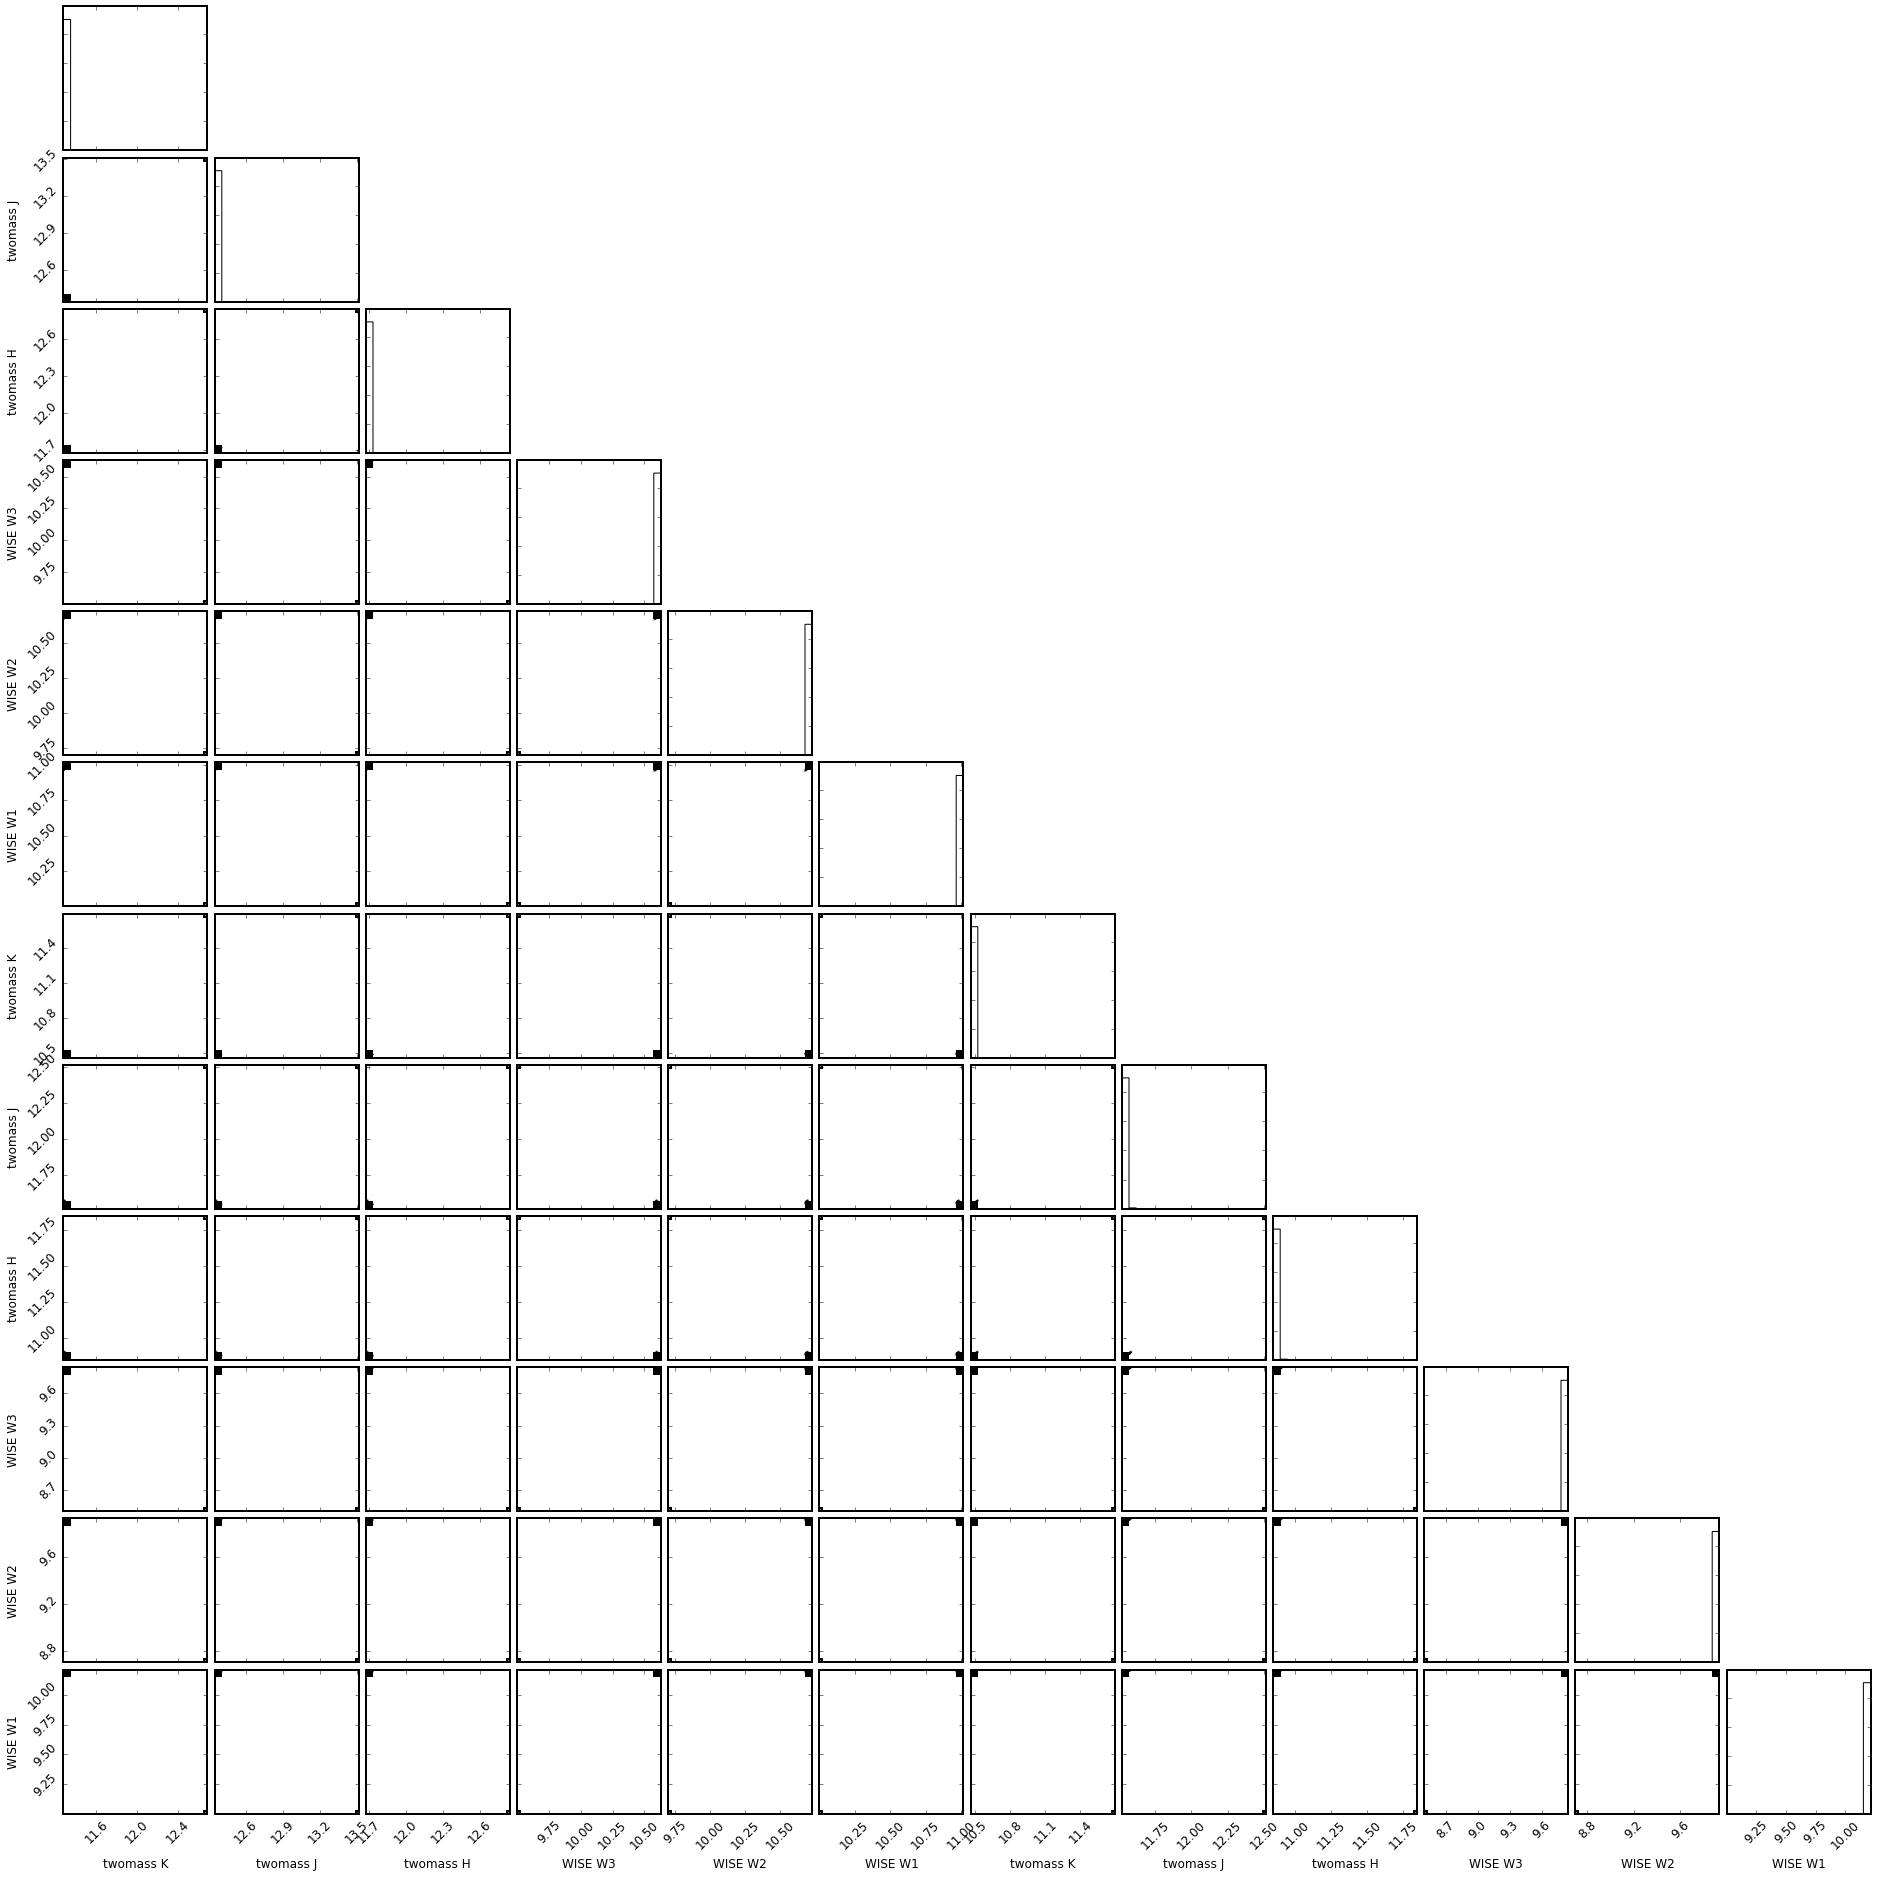

In [45]:
# OK, full disclosure, I totally made up that model.  Here you can see it makes no sense...
mod4.corner_observed();

In [40]:
!cat ../isochrones/tests/star3/star.ini

maxAV = 1.216
RA = 299.268036
dec = 45.227428
Teff = 4135, 98.0
feh = -0.46, 0.16
logg = 4.711, 0.1

[KIC]
g = 16.5832173, 0.05
r = 15.341168, 0.05
i = 14.917236, 0.05
z = 14.6382752, 0.05

[twomass]
J = 13.513, 0.02
H = 12.845, 0.02
K = 12.693, 0.02

[NIRC2]
resolution = 0.1
separation_1 = 0.6
PA_1 = 100
K_1 = 3.66, 0.05
H_1 = 3.77, 0.03
J_1 = 3.74, 0.05
separation_2 = 1.2
PA_2 = 200
K_2 = 5.1, 0.1
H_2 = 5.2, 0.1
J_2 = 5.15, 0.1


In [41]:
mod5 = StarModel.from_ini(mist, '../isochrones/tests/star3')
mod5.obs.print_ascii()

root
 ╚═ KIC g=(16.58, 0.05) @(0.00, 0 [4.00])
    ╚═ KIC i=(14.92, 0.05) @(0.00, 0 [4.00])
       ╚═ KIC r=(15.34, 0.05) @(0.00, 0 [4.00])
          ╚═ KIC z=(14.64, 0.05) @(0.00, 0 [4.00])
             ╚═ twomass H=(12.85, 0.02) @(0.00, 0 [4.00])
                ╚═ twomass J=(13.51, 0.02) @(0.00, 0 [4.00])
                   ╚═ twomass K=(12.69, 0.02) @(0.00, 0 [4.00])
                      ╠═ NIRC2 delta-H=(0.00, 0.01) @(0.00, 0 [0.10])
                      ║  ╚═ NIRC2 delta-J=(0.00, 0.01) @(0.00, 0 [0.10])
                      ║     ╚═ NIRC2 delta-K=(0.00, 0.01) @(0.00, 0 [0.10])
                      ║        ╚═ 0_0, logg=[4.711, 0.1], Teff=[4135.0, 98.0], feh=[-0.46, 0.16]
                      ╠═ NIRC2 delta-H=(3.77, 0.03) @(0.60, 100 [0.10])
                      ║  ╚═ NIRC2 delta-J=(3.74, 0.05) @(0.60, 100 [0.10])
                      ║     ╚═ NIRC2 delta-K=(3.66, 0.05) @(0.60, 100 [0.10])
                      ║        ╚═ 0_1
                      ╚═ NIRC2 delta-H=(5.20, 0

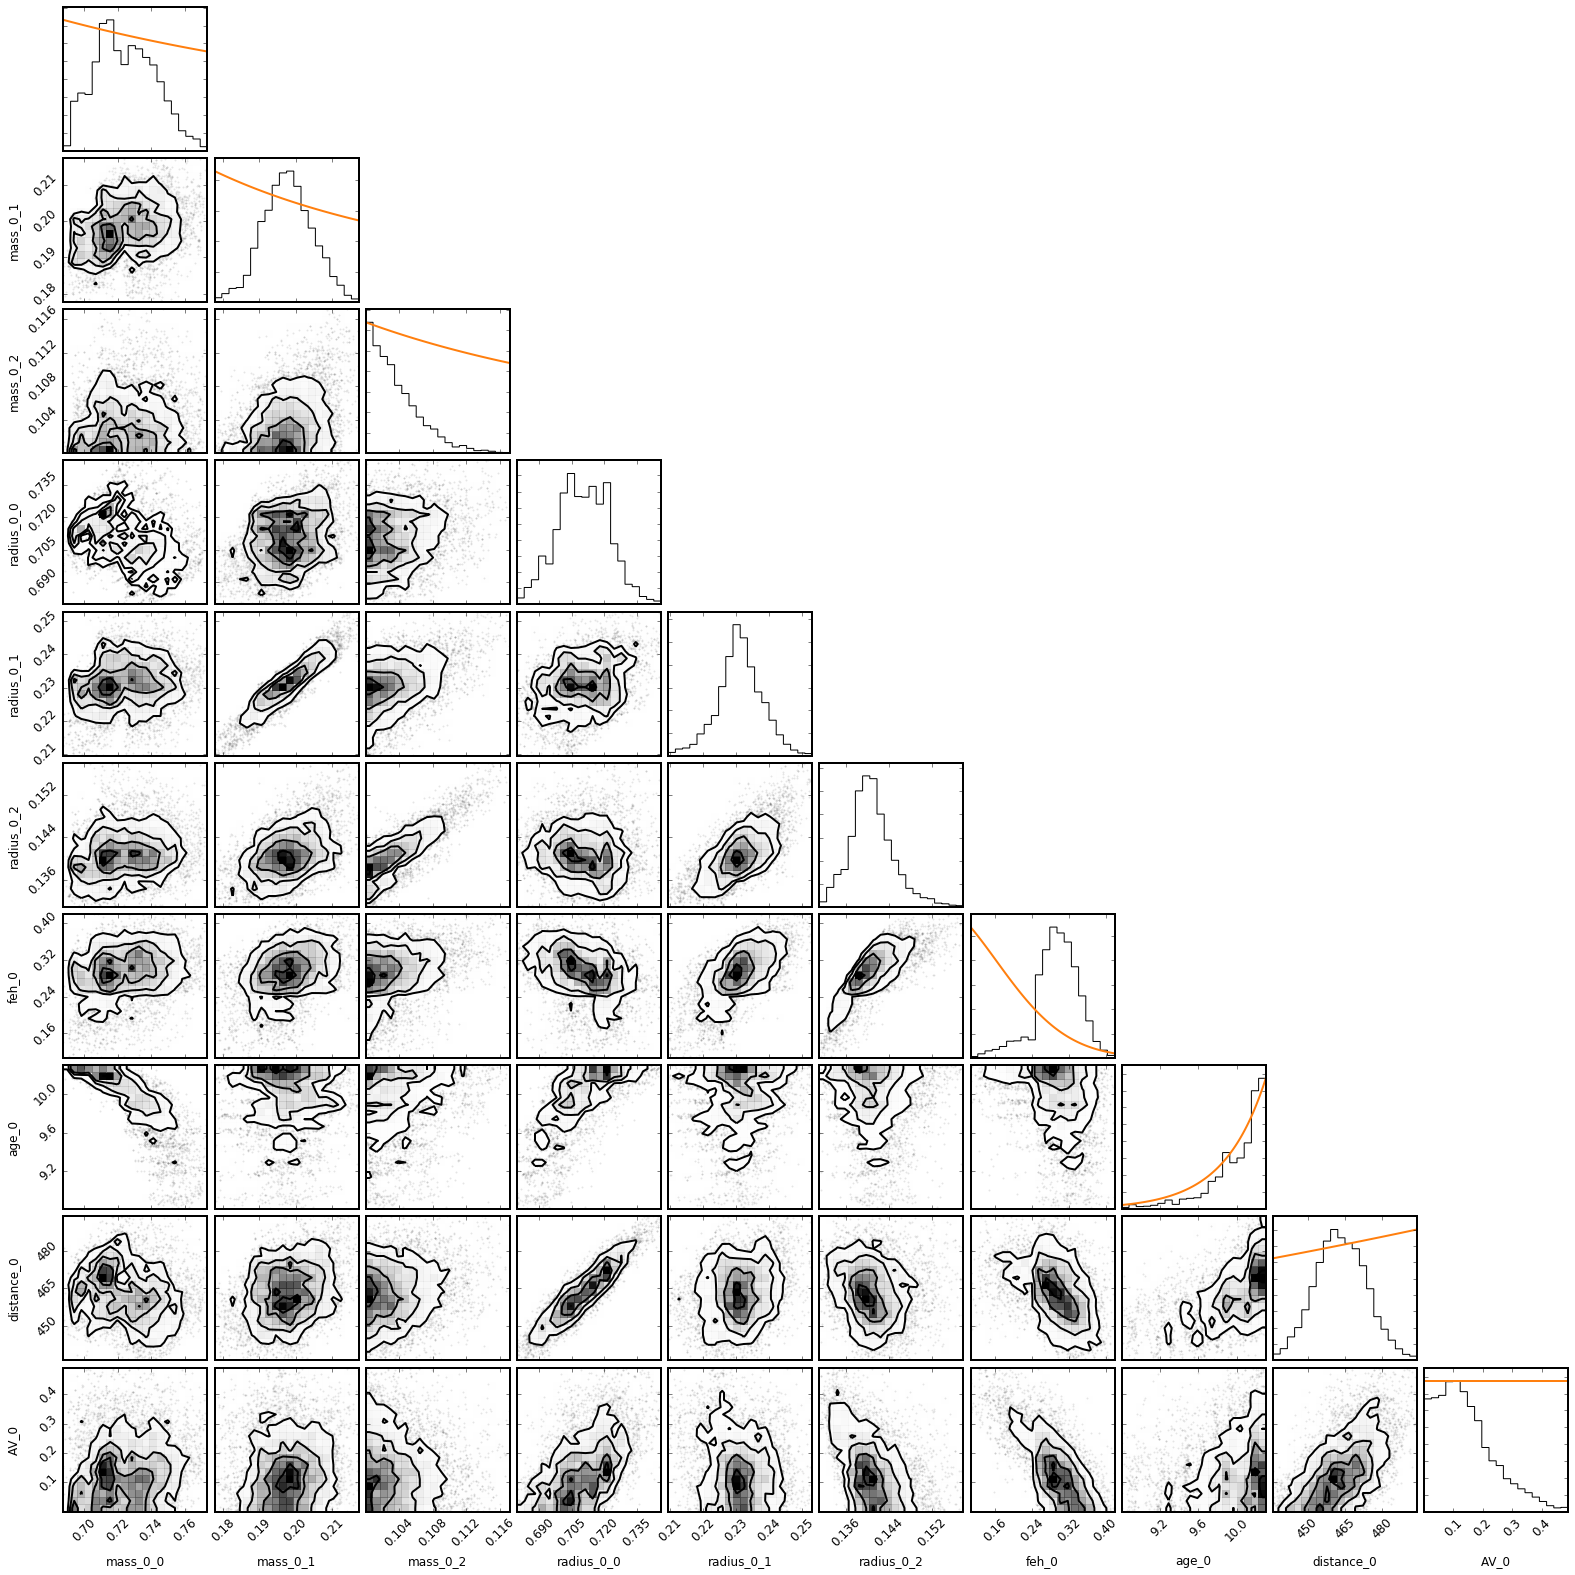

In [42]:
mod5.fit(basename='star3_demo')
mod5.corner_physical();

In [ ]:
# nu_max, delta_nu, also density
# BASTA grids (and PARSEC)

In [2]:
from isochrones import get_ichrone
mist = get_ichrone('mist')

In [3]:
mass, age, feh, distance, AV = (0.95, 9.61, -0.2, 200, 0.2)
mist.mag['g'](mass, age, feh, distance, AV)

11.788065261437591

In [4]:
mist.bands

['B', 'G', 'H', 'J', 'K', 'Kepler', 'V', 'W1', 'W2', 'W3', 'g', 'i', 'r', 'z']